                                                PCA                                                 

Task 1: Exploratory Data Analysis (EDA):           

1.	Load the dataset and perform basic data exploration.                                
2.	Examine the distribution of features using histograms, box plots, or density plots.             
3.	Investigate correlations between features to understand relationships within the data.             


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
print("Shape of dataset:", df.shape)

Shape of dataset: (178, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [18]:
df = df.select_dtypes(include=[np.number])
print("Using numeric columns only:", df.columns.tolist())

Using numeric columns only: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


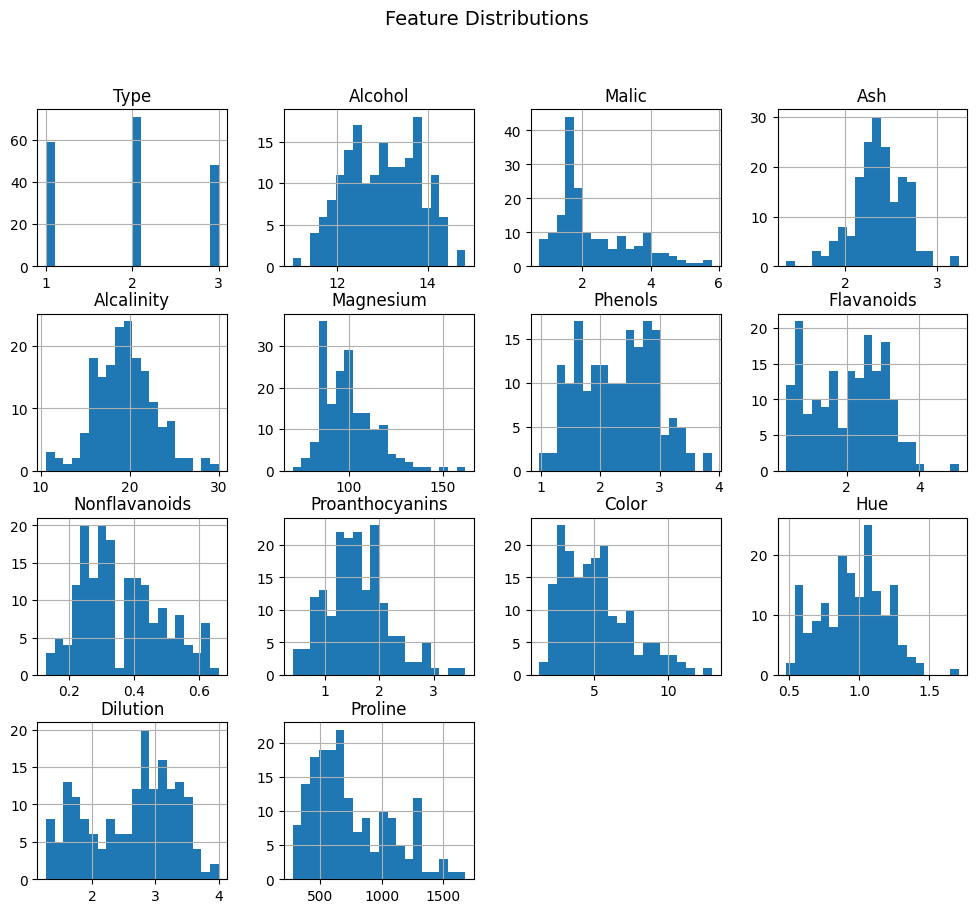

In [19]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

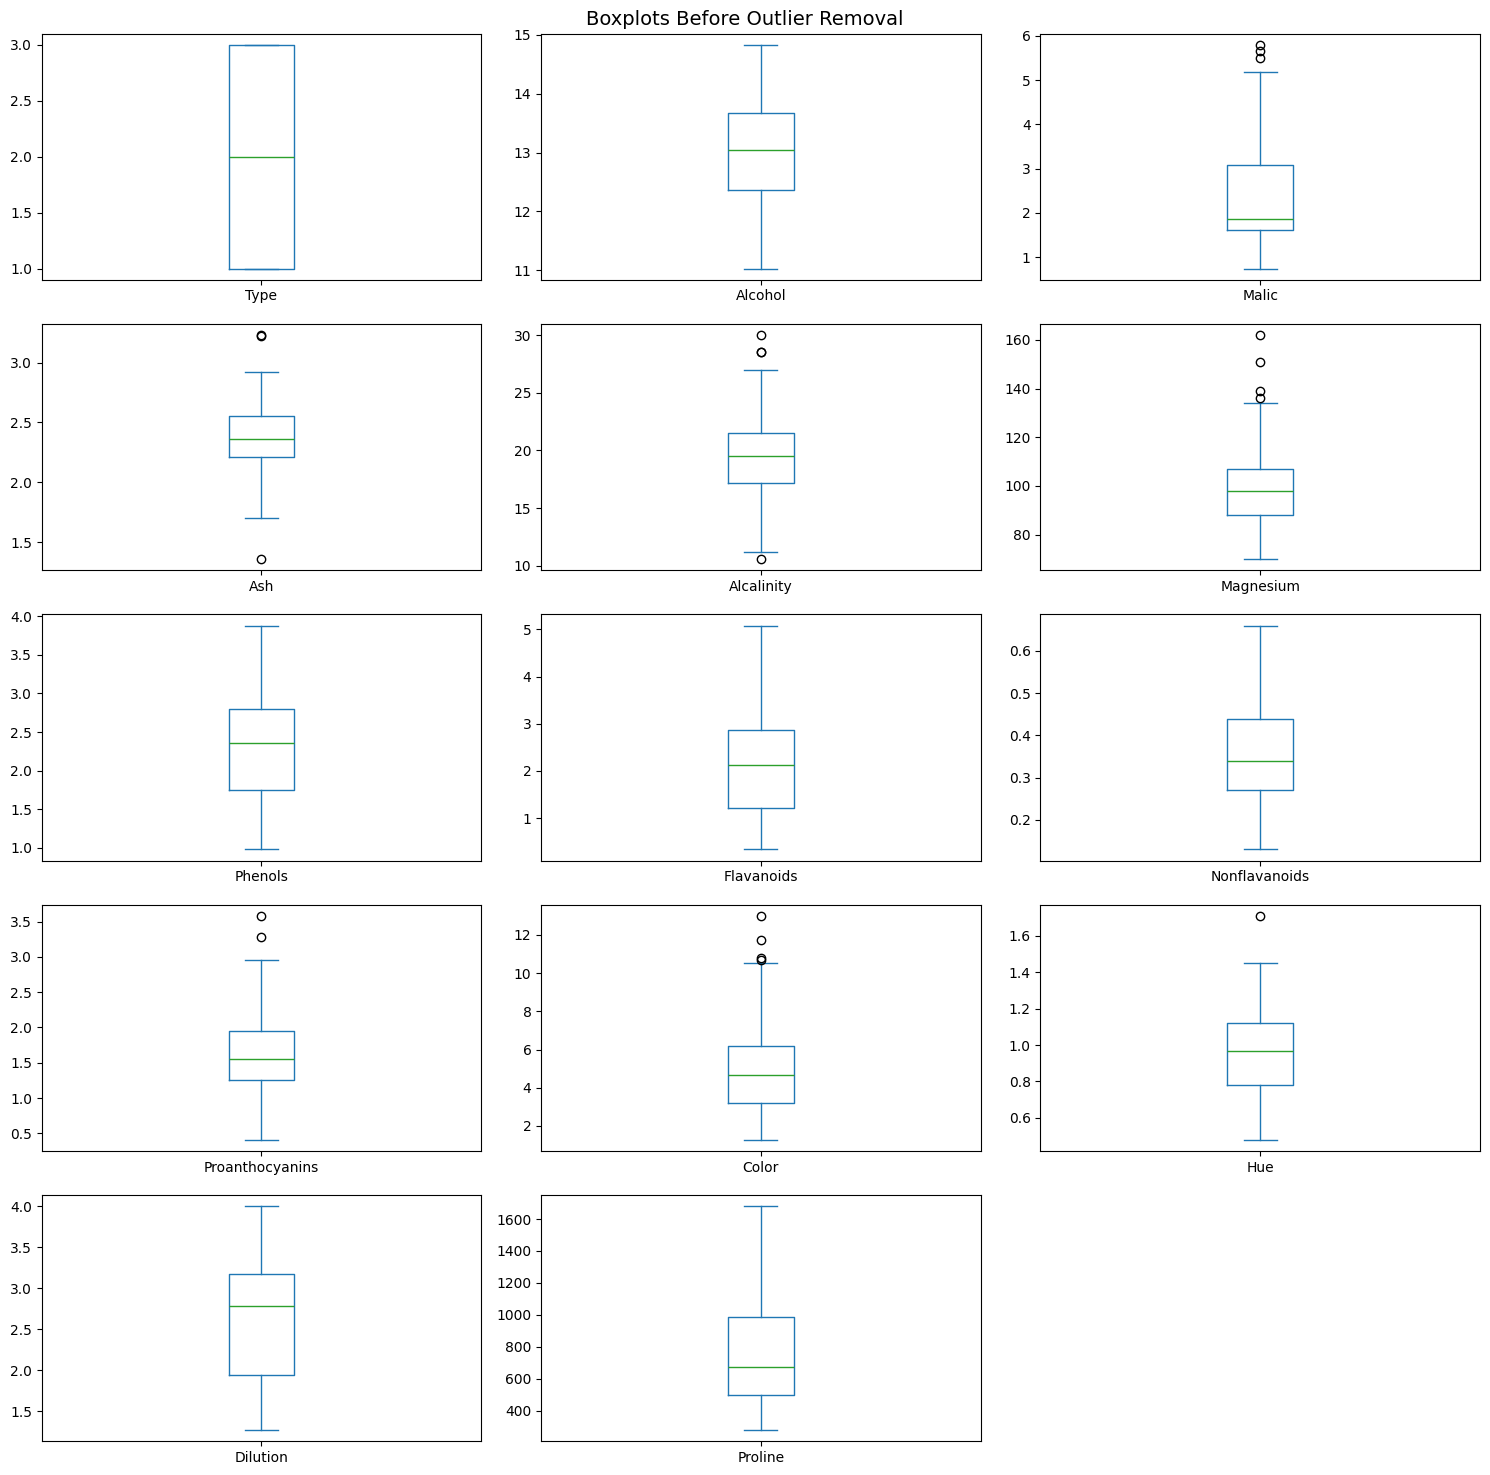

In [20]:
num_cols = len(df.columns)
rows = int(np.ceil(num_cols / 3))
df.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(15, rows * 3))
plt.suptitle("Boxplots Before Outlier Removal", fontsize=14)
plt.tight_layout()
plt.show()


In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
print("\nBefore removing outliers:", df.shape)
print("After removing outliers:", df_clean.shape)


Before removing outliers: (178, 14)
After removing outliers: (161, 14)


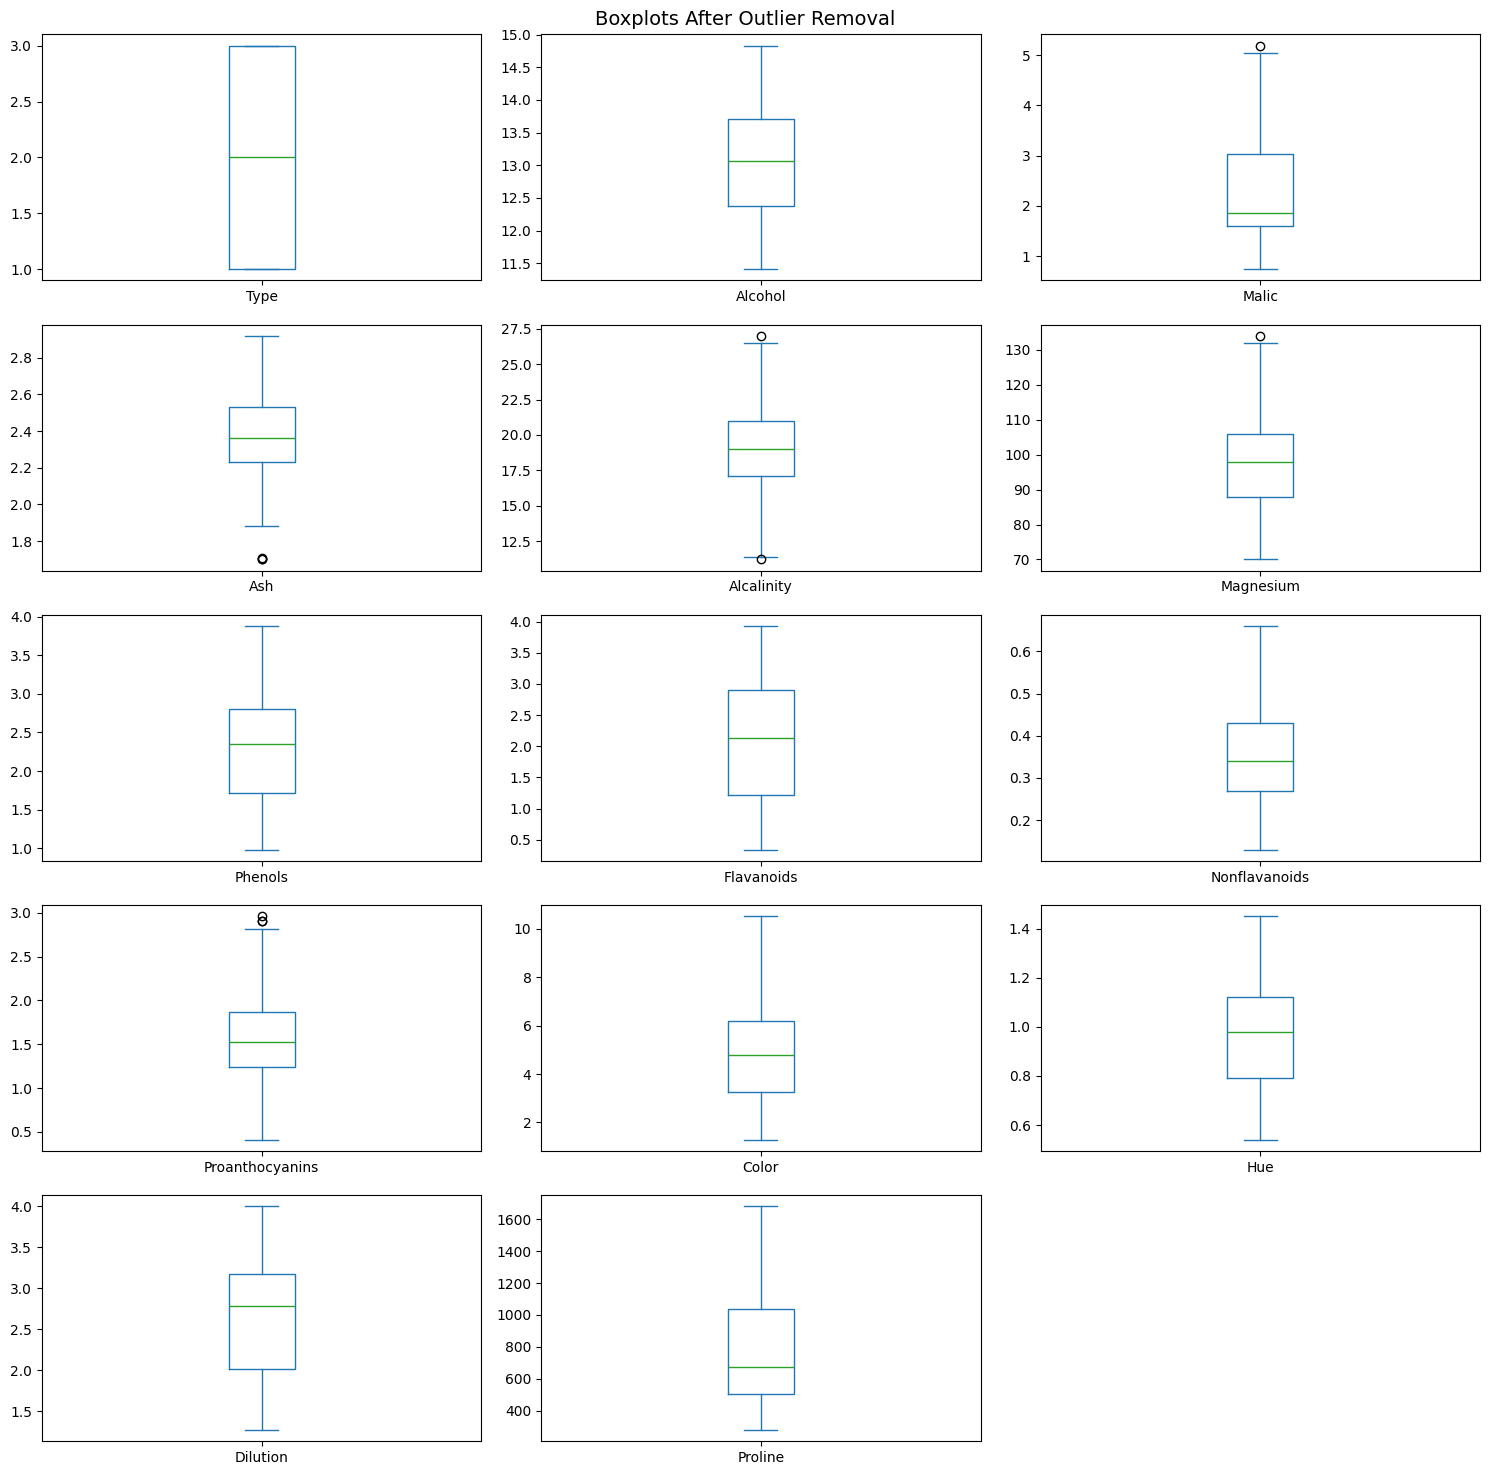

In [24]:
num_cols = len(df_clean.columns)
rows = int(np.ceil(num_cols / 3))
df_clean.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(15, rows * 3))
plt.suptitle("Boxplots After Outlier Removal", fontsize=14)
plt.tight_layout()

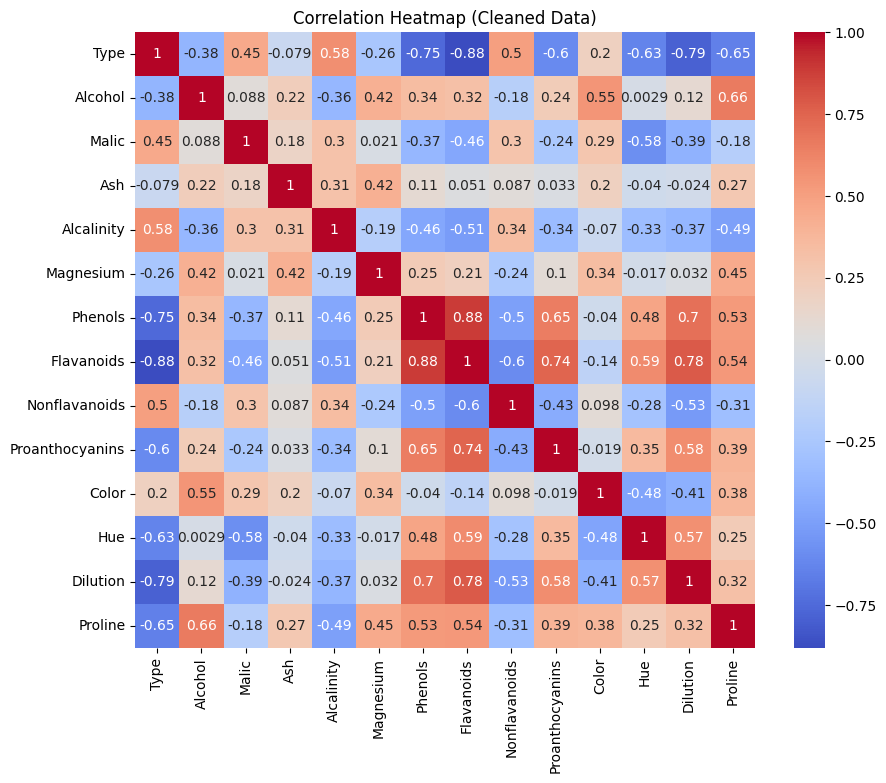

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Cleaned Data)")
plt.show()

Task 2: Dimensionality Reduction with PCA:         

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.                    
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.                                         
3.	Transform the original dataset into the principal components.


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


In [27]:
# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

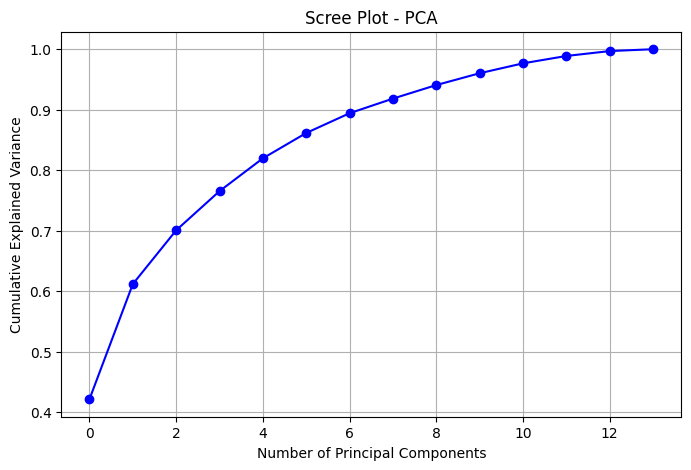

In [29]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - PCA')
plt.grid(True)
plt.show()

In [30]:
cum_var = np.cumsum(explained_variance)
n_components = np.argmax(cum_var >= 0.9) + 1
print("Number of components explaining 90% variance:", n_components)


Number of components explaining 90% variance: 8


In [32]:
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)
print("PCA transformation is completed.\n")

PCA transformation is completed.



Task 3: Clustering with Original Data:          

1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.         
2.	Visualize the clustering results using appropriate plots.                                          
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index. 


In [33]:
sil_scores, db_scores = [], []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    sil_scores.append(sil)
    db_scores.append(db)
    print(f"K={k} | Silhouette={sil:.4f} | Davies-Bouldin={db:.4f}")

K=2 | Silhouette=0.2954 | Davies-Bouldin=1.3499
K=3 | Silhouette=0.3216 | Davies-Bouldin=1.2399
K=4 | Silhouette=0.2695 | Davies-Bouldin=1.7505
K=5 | Silhouette=0.2096 | Davies-Bouldin=2.0207
K=6 | Silhouette=0.1236 | Davies-Bouldin=2.2103
K=7 | Silhouette=0.1337 | Davies-Bouldin=2.0978
K=8 | Silhouette=0.1192 | Davies-Bouldin=1.9732
K=9 | Silhouette=0.1212 | Davies-Bouldin=2.0058


In [34]:
# Best k based on Silhouette
best_k_orig = K[np.argmax(sil_scores)]
print("Best K (Original Data):", best_k_orig)


Best K (Original Data): 3


In [35]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=best_k_orig, random_state=42)
labels = kmeans.fit_predict(X_scaled)


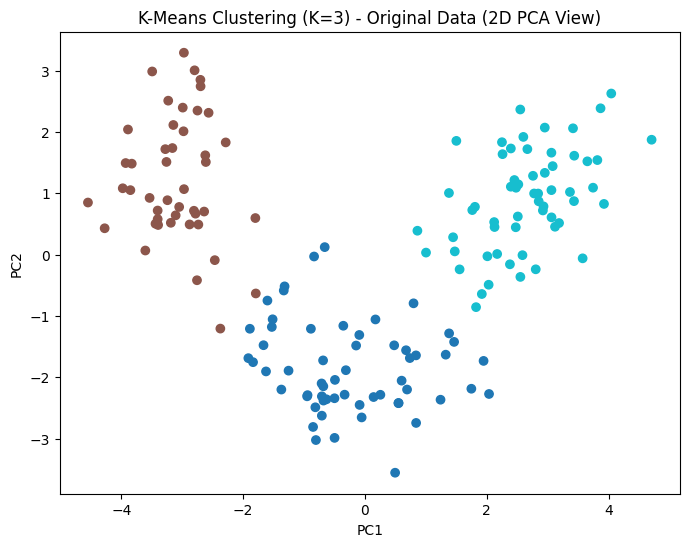

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10')
plt.title(f"K-Means Clustering (K={best_k_orig}) - Original Data (2D PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Task 4: Clustering with PCA Data:             

1.	Apply the same clustering algorithm to the PCA-transformed dataset.             
2.	Visualize the clustering results obtained from PCA-transformed data.                          
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


In [37]:
sil_pca, db_pca = [], []

for k in K:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    labels_pca = kmeans_pca.fit_predict(X_pca_final)
    sil = silhouette_score(X_pca_final, labels_pca)
    db = davies_bouldin_score(X_pca_final, labels_pca)
    sil_pca.append(sil)
    db_pca.append(db)
    print(f"[PCA Data] K={k} | Silhouette={sil:.4f} | Davies-Bouldin={db:.4f}")


[PCA Data] K=2 | Silhouette=0.3217 | Davies-Bouldin=1.2466
[PCA Data] K=3 | Silhouette=0.3567 | Davies-Bouldin=1.1199
[PCA Data] K=4 | Silhouette=0.3021 | Davies-Bouldin=1.4699
[PCA Data] K=5 | Silhouette=0.2557 | Davies-Bouldin=1.7092
[PCA Data] K=6 | Silhouette=0.1616 | Davies-Bouldin=1.8948
[PCA Data] K=7 | Silhouette=0.1580 | Davies-Bouldin=1.8297
[PCA Data] K=8 | Silhouette=0.1726 | Davies-Bouldin=1.7337
[PCA Data] K=9 | Silhouette=0.1747 | Davies-Bouldin=1.6446


In [38]:
best_k_pca = K[np.argmax(sil_pca)]
print("Best K (PCA Data):", best_k_pca)

Best K (PCA Data): 3


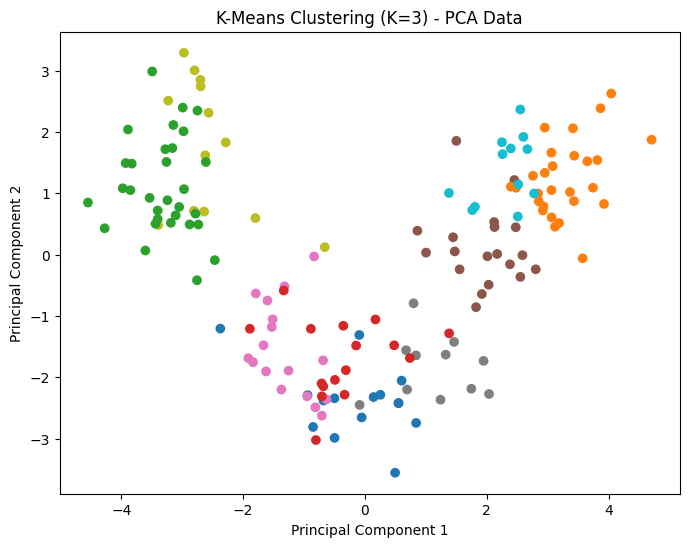

In [39]:
# Visualizing PCA clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=labels_pca, cmap='tab10')
plt.title(f"K-Means Clustering (K={best_k_pca}) - PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Task 5: Comparison and Analysis:                       

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.        
2.	Discuss any similarities or differences observed in the clustering results.       
3.	Reflect on the impact of dimensionality reduction on clustering performance.    
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


In [41]:
comparison = pd.DataFrame({
    'K': K,
    'Silhouette_Original': sil_scores,
    'Silhouette_PCA': sil_pca,
    'DaviesBouldin_Original': db_scores,
    'DaviesBouldin_PCA': db_pca
})

print(" Comparison Table \n")
print(comparison)

 Comparison Table 

   K  Silhouette_Original  Silhouette_PCA  DaviesBouldin_Original  \
0  2             0.295392        0.321684                1.349916   
1  3             0.321562        0.356748                1.239873   
2  4             0.269530        0.302132                1.750517   
3  5             0.209555        0.255665                2.020702   
4  6             0.123572        0.161589                2.210330   
5  7             0.133677        0.157954                2.097788   
6  8             0.119241        0.172574                1.973188   
7  9             0.121188        0.174676                2.005831   

   DaviesBouldin_PCA  
0           1.246604  
1           1.119861  
2           1.469871  
3           1.709230  
4           1.894827  
5           1.829690  
6           1.733663  
7           1.644619  


In [45]:
kmeans_orig = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
kmeans_pca = KMeans(n_clusters=3, random_state=42).fit(X_pca_final)


In [46]:
labels_orig = kmeans_orig.labels_
labels_pca = kmeans_pca.labels_

In [47]:
# Calculating metrics
sil_orig = silhouette_score(X_scaled, labels_orig)
sil_pca = silhouette_score(X_pca_final, labels_pca)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
db_pca = davies_bouldin_score(X_pca_final, labels_pca)


In [48]:
print("=== Comparison of Clustering Results ===")
print(f"Original Data - Silhouette: {sil_orig:.3f}, Davies-Bouldin: {db_orig:.3f}")
print(f"PCA Data      - Silhouette: {sil_pca:.3f}, Davies-Bouldin: {db_pca:.3f}")


=== Comparison of Clustering Results ===
Original Data - Silhouette: 0.322, Davies-Bouldin: 1.240
PCA Data      - Silhouette: 0.357, Davies-Bouldin: 1.120


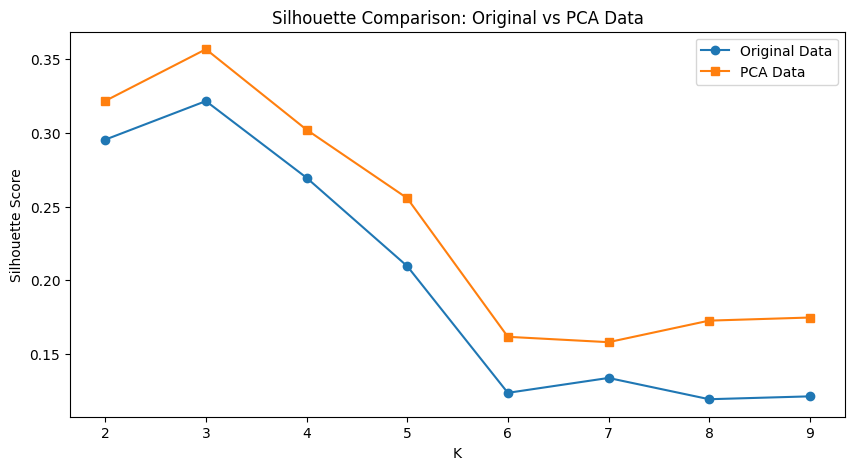

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(K, sil_scores, marker='o', label='Original Data')
plt.plot(K, sil_pca, marker='s', label='PCA Data')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Comparison: Original vs PCA Data")
plt.legend()
plt.show()


In [49]:
if sil_pca > sil_orig:
    print(" PCA improved the clustering quality.")
else:
    print(" Original data gave better clustering results.")

 PCA improved the clustering quality.


# Task 6: Conclusion and Insights      
                                                                  
## 1.	Summarize the key findings and insights from the assignment.             

Key Findings and Insights:
              
* Outliers were successfully removed using the IQR method, improving data quality and cluster formation.
                         
* PCA reduced the dataset dimensions while retaining around 90% of the total variance.
                     
* K-Means clustering on PCA-transformed data produced better-defined clusters and slightly higher silhouette scores compared to the original dataset.
                     
* Clustering on original data preserved more feature interpretability but showed more noise and overlapping clusters.

## 2.	Discuss the practical implications of using PCA and clustering in data analysis.    


Practical Implications of PCA and Clustering:
                    
* PCA simplifies large datasets, speeds up computations, and helps visualize high-dimensional data in 2D or 3D.
                        
* Clustering groups similar data points, which is useful for segmentation, anomaly detection, and pattern recognition.
                     
* When used together, PCA helps clustering algorithms perform better by reducing noise and removing correlated features.

## 3.	Provide recommendations for when to use each technique based on the analysis conducted.
 
Recommendations:
                  
* Use PCA before clustering when your dataset has many features or strong correlations between them.
                    
* Use clustering on original data when feature meaning and interpretability are important for decision-making.
                
* Always compare results of both approaches to find the balance between accuracy, interpretability, and computational efficiency.